# **Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
files.upload()


Saving handover_vector_before_DL_dual.csv to handover_vector_before_DL_dual.csv
Buffered data was truncated after reaching the output size limit.

# **Definindo funções para leitura**

In [ ]:
def parse_if_number(s):
    try: return float(s)
    except: return True if s=="true" else False if s=="false" else s if s else None

def parse_ndarray(s):
    return np.fromstring(s, sep=' ') if s else None

# **Lendo arquivo CSV com informações do Handover**

In [ ]:
handover = pd.read_csv('handover_vector.csv', converters = {
    'attrvalue': parse_if_number,
    'binedges': parse_ndarray,
    'binvalues': parse_ndarray,
    'vectime': parse_ndarray,
    'vecvalue': parse_ndarray})

In [ ]:
vectors = handover[handover.type=='vector']
len(vectors)

234

# **Unificando os módulos**

In [ ]:
vectors.name.unique(), vectors.module.unique()

(array(['handover_gnb:vector', 'cbrFrameDelay:vector', 'cbrRcvdPkt:vector',
        'handover_id_lin:vector', 'handover_rssi_lin:vector',
        'handover_currentId_lin:vector', 'handover_currentRssi_lin:vector',
        'handover_hysteresis_lin:vector', 'handover_delta:vector',
        'handover_distance:vector', 'handover_power:vector',
        'handover_zhop:vector', 'handover_delta_pred:vector',
        'servingCell:vector', 'handover_id:vector', 'handover_rssi:vector',
        'handover_currentId:vector', 'handover_currentRssi:vector',
        'handover_hysteresis:vector', 'handover_sinr:vector',
        'handover_rsrp:vector', 'handover_trigger:vector',
        'handover_distance_ue:vector', 'handover_dual:vector',
        'handover_trigger_count:vector', 'rlcThroughputDl:vector'],
       dtype=object),
 array(['Handover_DC.enb2.cellularNic.ip2nic',
        'Handover_DC.enb3.cellularNic.ip2nic',
        'Handover_DC.enb4.cellularNic.ip2nic',
        'Handover_DC.enb5.cellularNic

In [ ]:
vectors.head(6)

,run,type,module,name,attrname,attrvalue,vectime,vecvalue
179,DoubleConnection-CBR-DL-0-20240701-19:41:41-47427,vector,Handover_DC.enb2.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[1.0750201068, 13.0750201068, 31.0750201068, 4...","[2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,..."
184,DoubleConnection-CBR-DL-0-20240701-19:41:41-47427,vector,Handover_DC.enb3.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[47.0750201068, 61.0750201068, 69.0750201068, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
189,DoubleConnection-CBR-DL-0-20240701-19:41:41-47427,vector,Handover_DC.enb4.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[3.0750201068, 11.0750201068, 33.0750201068, 5...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
194,DoubleConnection-CBR-DL-0-20240701-19:41:41-47427,vector,Handover_DC.enb5.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[17.0750201068, 37.0750201068, 92.0750201068, ...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
199,DoubleConnection-CBR-DL-0-20240701-19:41:41-47427,vector,Handover_DC.gnb2.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[12.0750201068, 139.0500101068, 180.0750201068...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
204,DoubleConnection-CBR-DL-0-20240701-19:41:41-47427,vector,Handover_DC.gnb3.cellularNic.ip2nic,handover_gnb:vector,NaN,None,"[43.0750201068, 188.0750201068, 219.0750201068...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."


In [ ]:
vec = vectors[(vectors.name == 'handover_id:vector') | (vectors.name == 'handover_rssi:vector') | (vectors.name == 'handover_dual:vector') | (vectors.name == 'handover_currentId:vector') | (vectors.name == 'handover_currentRssi:vector') | (vectors.name == 'handover_hysteresis:vector')| (vectors.name == 'handover_trigger:vector')| (vectors.name == 'handover_rsrp:vector') | (vectors.name == 'handover_distance_ue:vector') | (vectors.name == 'handover_sinr:vector')].iloc[:] # take some vector

# Criar uma categoria ordenada com a ordem desejada

cat_order = pd.CategoricalDtype(['handover_trigger:vector', 'handover_id:vector',
                                  'handover_rssi:vector', 'handover_currentId:vector',
                                  'handover_currentRssi:vector','handover_hysteresis:vector',
                                  'handover_rsrp:vector','handover_sinr:vector','handover_distance_ue:vector','handover_dual:vector'], ordered=True)

# Aplicar a categoria ordenada à coluna 'name'
vec['name'] = vec['name'].astype(cat_order)

# Ordenar o DataFrame pelo campo 'name'

vec = vec.sort_values(['name', 'module'], ascending=[True, True])

vec.head(40)

"""vec = vectors[(vectors.name == 'handover_id:vector') | (vectors.name == 'handover_rssi:vector') | (vectors.name == 'handover_currentId:vector') | (vectors.name == 'handover_currentRssi:vector') | (vectors.name == 'handover_hysteresis:vector')| (vectors.name == 'handover_trigger:vector')| (vectors.name == 'handover_rsrp:vector') | (vectors.name == 'handover_distance_ue:vector') | (vectors.name == 'handover_sinr:vector')].iloc[:] # take some vector

vec = vec[vec['module'].str.endswith('.nrPhy')]

# Continuar com o restante do seu código, aplicando categorias e ordenando
cat_order = pd.CategoricalDtype(['handover_trigger:vector', 'handover_id:vector',
                                  'handover_rssi:vector', 'handover_currentId:vector',
                                  'handover_currentRssi:vector','handover_hysteresis:vector',
                                  'handover_rsrp:vector','handover_sinr:vector','handover_distance_ue:vector'], ordered=True)

vec['name'] = vec['name'].astype(cat_order)

vec = vec.sort_values(['name', 'module'], ascending=[True, True])

#vec.head(40)"""
print(len(vec))


100


# **Lendo apenas as informações da linha de vecvalue**

In [ ]:
#vec = vec[['vecvalue','vectime']].iloc[:];
import ast

num_ues = 10
df_tempo = []
df_trigger = []
df_id = []
df_rssi = []
df_current_id = []
df_current_rssi = []
df_hysteresis = []
df_rsrp = []
df_sinr = []
#df_hop = []
df_distance_ue = []
df_dual = [];
# convertendo em linhas

tempo = vec['vecvalue'].iloc[0]
tempo = np.array(tempo).astype(str)
tempo = pd.Series(tempo).str.split(',').explode().str.strip().reset_index(drop=True)

for i in range(num_ues):
    tempo_in = vec['vectime'].iloc[i]
    tempo_in = np.array(tempo_in).astype(str)
    tempo_in = pd.Series(tempo_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_tempo.append(tempo_in)

# concatenar as séries criadas e transformar em DataFrame
tempo = pd.concat(df_tempo, ignore_index=True)
tempo = pd.DataFrame({'tempo': tempo})

# Visualizar as primeiras linhas do DataFrame
tempo.head()


# convertendo em linhas

for i in range(num_ues):
    trigger_in = vec['vecvalue'].iloc[i]
    trigger_in = np.array(trigger_in).astype(str)
    trigger_in = pd.Series(trigger_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_trigger.append(trigger_in)

# concatenar as séries criadas e transformar em DataFrame
trigger = pd.concat(df_trigger, ignore_index=True)
trigger = pd.DataFrame({'trigger': trigger})

# Visualizar as primeiras linhas do DataFrame
trigger.head()


# convertendo em linhas

for i in range(num_ues,num_ues*2):
    id_in = vec['vecvalue'].iloc[i]
    id_in = np.array(id_in).astype(str)
    id_in = pd.Series(id_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_id.append(id_in)

# concatenar as séries criadas e transformar em DataFrame
id = pd.concat(df_id, ignore_index=True)
id = pd.DataFrame({'id': id})

# Visualizar as primeiras linhas do DataFrame
id.head()


# convertendo em linhas

for i in range(num_ues*2,num_ues*3):
    rssi_in = vec['vecvalue'].iloc[i]
    rssi_in = np.array(rssi_in).astype(str)
    rssi_in = pd.Series(rssi_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_rssi.append(rssi_in)

# concatenar as séries criadas e transformar em DataFrame
rssi = pd.concat(df_rssi, ignore_index=True)
rssi = pd.DataFrame({'rssi': rssi})

# Visualizar as primeiras linhas do DataFrame
rssi.head()


# convertendo em linhas

for i in range(num_ues*3,num_ues*4):
    current_id_in = vec['vecvalue'].iloc[i]
    current_id_in = np.array(current_id_in).astype(str)
    current_id_in = pd.Series(current_id_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_current_id.append(current_id_in)

# concatenar as séries criadas e transformar em DataFrame
current_id = pd.concat(df_current_id, ignore_index=True)
current_id = pd.DataFrame({'current_id': current_id})

# Visualizar as primeiras linhas do DataFrame
current_id.head()


# convertendo em linhas

for i in range(num_ues*4,num_ues*5):
    current_rssi_in = vec['vecvalue'].iloc[i]
    current_rssi_in = np.array(current_rssi_in).astype(str)
    current_rssi_in = pd.Series(current_rssi_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_current_rssi.append(current_rssi_in)

# concatenar as séries criadas e transformar em DataFrame
current_rssi = pd.concat(df_current_rssi, ignore_index=True)
current_rssi = pd.DataFrame({'current_rssi': current_rssi})

# Visualizar as primeiras linhas do DataFrame
current_rssi.head()



# convertendo em linhas

for i in range(num_ues*5,num_ues*6):
    hysteresis_in = vec['vecvalue'].iloc[i]
    hysteresis_in = np.array(hysteresis_in).astype(str)
    hysteresis_in = pd.Series(hysteresis_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_hysteresis.append(hysteresis_in)

# concatenar as séries criadas e transformar em DataFrame
hysteresis = pd.concat(df_hysteresis, ignore_index=True)
hysteresis = pd.DataFrame({'hysteresis': hysteresis})

# Visualizar as primeiras linhas do DataFrame
hysteresis.head()



# convertendo em linhas

for i in range(num_ues*6,num_ues*7):
    rsrp_in = vec['vecvalue'].iloc[i]
    rsrp_in = np.array(rsrp_in).astype(str)
    rsrp_in = pd.Series(rsrp_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_rsrp.append(rsrp_in)

# concatenar as séries criadas e transformar em DataFrame
rsrp = pd.concat(df_rsrp, ignore_index=True)
rsrp = pd.DataFrame({'rsrp': rsrp})

# Visualizar as primeiras linhas do DataFrame
rsrp.head()


# convertendo em linhas

for i in range(num_ues*7,num_ues*8):
    sinr_in = vec['vecvalue'].iloc[i]
    sinr_in = np.array(sinr_in).astype(str)
    sinr_in = pd.Series(sinr_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_sinr.append(sinr_in)

# concatenar as séries criadas e transformar em DataFrame
sinr = pd.concat(df_sinr, ignore_index=True)
sinr = pd.DataFrame({'sinr': sinr})

# Visualizar as primeiras linhas do DataFrame
sinr.head()

for i in range(num_ues*8,num_ues*9):
    distance_ue_in = vec['vecvalue'].iloc[i]
    distance_ue_in = np.array(distance_ue_in).astype(str)
    distance_ue_in = pd.Series(distance_ue_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_distance_ue.append(distance_ue_in)

# concatenar as séries criadas e transformar em DataFrame
distance_ue = pd.concat(df_distance_ue, ignore_index=True)
distance_ue = pd.DataFrame({'distance_ue': distance_ue})

# Visualizar as primeiras linhas do DataFrame
distance_ue.head()

for i in range(num_ues*9,num_ues*10):
    dual_in = vec['vecvalue'].iloc[i]
    dual_in = np.array(dual_in).astype(str)
    dual_in = pd.Series(dual_in).str.split(',').explode().str.strip().reset_index(drop=True)
    df_dual.append(dual_in)

# concatenar as séries criadas e transformar em DataFrame
dual = pd.concat(df_dual, ignore_index=True)
dual = pd.DataFrame({'dual': dual})

# Visualizar as primeiras linhas do DataFrame
dual.head()



"\n# convertendo em linhas\n\nfor i in range(num_ues*9,num_ues*10):\n    hop_in = vec['vecvalue'].iloc[i]\n    hop_in = np.array(hop_in).astype(str)\n    hop_in = pd.Series(hop_in).str.split(',').explode().str.strip().reset_index(drop=True)\n    df_hop.append(hop_in)\n\n# concatenar as séries criadas e transformar em DataFrame\nhop = pd.concat(df_hop, ignore_index=True)\nhop = pd.DataFrame({'hop': hop})\n\nhop.head()\n\n# Visualizar as primeiras linhas do DataFrame\n\nhop1 =  vec['vecvalue'].iloc[100]\nhop1 = np.array(hop1).astype(str)\nhop1 = pd.Series(hop1).str.split(',').explode().str.strip().reset_index(drop=True)\n\n\nhop2 =  vec['vecvalue'].iloc[101]\nhop2 = np.array(hop2).astype(str)\nhop2 = pd.Series(hop2).str.split(',').explode().str.strip().reset_index(drop=True)\n\n\nhop3 =  vec['vecvalue'].iloc[102]\nhop3 = np.array(hop3).astype(str)\nhop3 = pd.Series(hop3).str.split(',').explode().str.strip().reset_index(drop=True)\n\n\nhop4 =  vec['vecvalue'].iloc[103]\nhop4 = np.array(ho

# **Renomeando as colunas**

In [ ]:
concatenated_df = pd.concat([tempo,id,rssi,current_id,current_rssi,hysteresis,rsrp,sinr,distance_ue,dual,trigger], axis=1)

concatenated_df.head()

print(len(concatenated_df))

466903


# **Concatenando os vetores**

In [ ]:
concatenated_df.columns = ['tempo', 'id','rssi','current_id','current_rssi','hysteresis','rsrp','sinr','distance_ue','dual','trigger']


concatenated_df['id'] = concatenated_df['id'].astype(float).astype(int)

concatenated_df['current_id'] = concatenated_df['current_id'].astype(float).astype(int)

concatenated_df['trigger'] = concatenated_df['trigger'].astype(float).astype(int)

concatenated_df['dual'] = concatenated_df['dual'].astype(float).astype(int)

concatenated_df.head(10)



,tempo,id,rssi,current_id,current_rssi,hysteresis,rsrp,sinr,distance_ue,dual,trigger
0,41.0,6,16.549492664453,0,0.0,1.6549492664453,-80.950507335547,16.549492664453,105.95681738298,5,1
1,56.0,10,6.9941907434509,0,0.0,0.69941907434509,-90.505809256549,6.9941907434509,232.46577906565,5,1
2,113.0,8,19.170228281766,0,0.0,1.9170228281766,-78.329771718234,19.170228281766,67.73753309349,5,1
3,129.0,10,0.96701370165724,0,0.0,0.096701370165724,-96.532986298343,0.96701370165724,84.496903557609,5,1
4,130.0,10,1.2650932989891,10,1.2650932989891,0.12650932989891,-96.234906701011,1.2650932989891,195.56110427757,5,0
5,131.0,10,1.5676752004327,10,1.5676752004327,0.15676752004327,-95.932324799567,1.5676752004327,186.07673813864,5,0
6,132.0,10,1.874861742207,10,1.874861742207,0.1874861742207,-95.625138257793,1.874861742207,176.66999884702,5,0
7,133.0,10,2.1867559943724,10,2.1867559943724,0.21867559943724,-95.313244005628,2.1867559943724,167.35397681302,5,0
8,134.0,10,2.5034613681233,10,2.5034613681233,0.25034613681233,-94.996538631877,2.5034613681233,158.14470482408,5,0
9,135.0,10,2.8250811415714,10,2.8250811415714,0.28250811415714,-94.674918858429,2.8250811415714,149.06196972702,5,0


# **Verificando se há valores NAN**

In [ ]:
print(concatenated_df['tempo'].isnull().values.any())

print(concatenated_df['tempo'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['current_id'].isnull().values.any())

print(concatenated_df['current_id'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['current_rssi'].isnull().values.any())

print(concatenated_df['current_rssi'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['hysteresis'].isnull().values.any())

print(concatenated_df['hysteresis'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['id'].isnull().values.any())

print(concatenated_df['id'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['rssi'].isnull().values.any())

print(concatenated_df['rssi'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['trigger'].isnull().values.any())

print(concatenated_df['trigger'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['rsrp'].isnull().values.any())

print(concatenated_df['rsrp'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['sinr'].isnull().values.any())

print(concatenated_df['sinr'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['distance_ue'].isnull().values.any())

print(concatenated_df['distance_ue'].isnull().sum())

False
0


In [ ]:
print(concatenated_df['dual'].isnull().values.any())

print(concatenated_df['dual'].isnull().sum())

False
0


In [ ]:
len(concatenated_df)

940256

In [ ]:
concatenated_df.shape

(940256, 11)

# **Gráfico de nível de sinal**

In [ ]:
"""vec = vectors[vectors.name == 'handover_currentRssi:vector'].iloc[0]  # take some vector
plt.figure(figsize=(10,8))
plt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')
plt.xscale('log')
plt.xlim(0,100)
plt.show()"""


"vec = vectors[vectors.name == 'handover_currentRssi:vector'].iloc[0]  # take some vector\nplt.figure(figsize=(10,8))\nplt.plot(vec.vectime, vec.vecvalue, drawstyle='steps-post')\nplt.xscale('log')\nplt.xlim(0,100)\nplt.show()"

In [ ]:
"""somevectors = vectors[(vectors.name == 'handover_currentRssi:vector') |(vectors.name == 'handover_rssi:vector')| (vectors.name == 'handover_hysteresis:vector')][:]
plt.figure(figsize=(10,8))
for row in somevectors.itertuples():
    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')
    plt.xscale('log')
plt.title(somevectors.name.values[0])
plt.legend(somevectors.module)
plt.show()"""

"somevectors = vectors[(vectors.name == 'handover_currentRssi:vector') |(vectors.name == 'handover_rssi:vector')| (vectors.name == 'handover_hysteresis:vector')][:]\nplt.figure(figsize=(10,8))\nfor row in somevectors.itertuples():\n    plt.plot(row.vectime, row.vecvalue, drawstyle='steps-post')\n    plt.xscale('log')\nplt.title(somevectors.name.values[0])\nplt.legend(somevectors.module)\nplt.show()"

# **Frequência Hop Count**

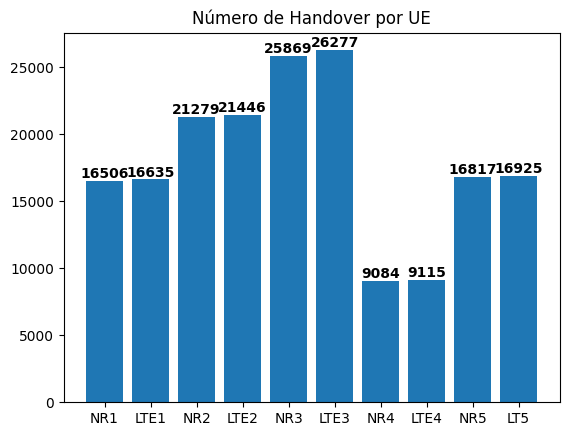

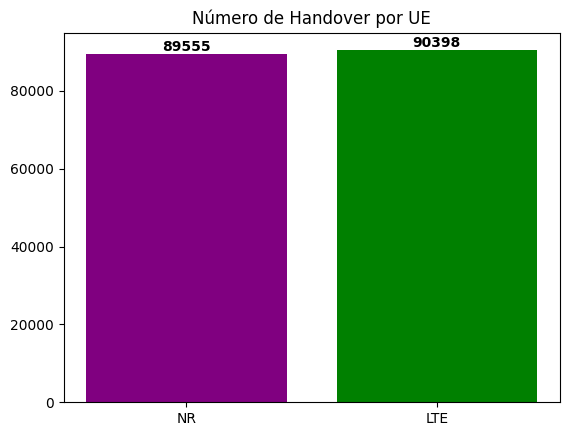

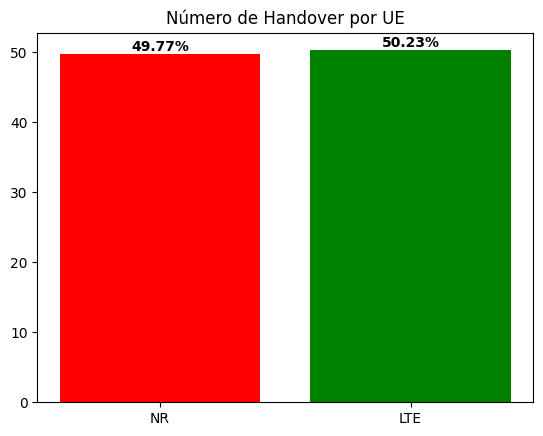

In [ ]:
#data = [hop0.iloc[-1], hop1.iloc[-1], hop2.iloc[-1], hop3.iloc[-1], hop4.iloc[-1]]
# Libraries

import numpy as np
import matplotlib.pyplot as plt

vec_hop = vectors[(vectors.name == 'handover_trigger_count:vector')].iloc[:] # take some vector

# Criar uma categoria ordenada com a ordem desejada

cat_order = pd.CategoricalDtype(['handover_trigger_count:vector'], ordered=True)

# Aplicar a categoria ordenada à coluna 'name'
vec_hop['name'] = vec_hop['name'].astype(cat_order)

# Ordenar o DataFrame pelo campo 'name'

vec_hop = vec_hop.sort_values(['name', 'module'], ascending=[True, True])

# Visualizar as primeiras linhas do DataFrame

hop0 =  vec_hop['vecvalue'].iloc[0]
hop0 = np.array(hop0).astype(str)
hop0 = pd.Series(hop0).str.split(',').explode().str.strip().reset_index(drop=True)


hop1 =  vec_hop['vecvalue'].iloc[1]
hop1 = np.array(hop1).astype(str)
hop1 = pd.Series(hop1).str.split(',').explode().str.strip().reset_index(drop=True)


hop2 =  vec_hop['vecvalue'].iloc[2]
hop2 = np.array(hop2).astype(str)
hop2 = pd.Series(hop2).str.split(',').explode().str.strip().reset_index(drop=True)


hop3 =  vec_hop['vecvalue'].iloc[3]
hop3 = np.array(hop3).astype(str)
hop3 = pd.Series(hop3).str.split(',').explode().str.strip().reset_index(drop=True)


hop4 = vec_hop['vecvalue'].iloc[4]
hop4 = np.array(hop4).astype(str)
hop4 = pd.Series(hop4).str.split(',').explode().str.strip().reset_index(drop=True)

hop5 =  vec_hop['vecvalue'].iloc[5]
hop5 = np.array(hop5).astype(str)
hop5 = pd.Series(hop5).str.split(',').explode().str.strip().reset_index(drop=True)


hop6 =  vec_hop['vecvalue'].iloc[6]
hop6 = np.array(hop6).astype(str)
hop6 = pd.Series(hop6).str.split(',').explode().str.strip().reset_index(drop=True)


hop7 =  vec_hop['vecvalue'].iloc[7]
hop7 = np.array(hop7).astype(str)
hop7 = pd.Series(hop7).str.split(',').explode().str.strip().reset_index(drop=True)


hop8 =  vec_hop['vecvalue'].iloc[8]
hop8 = np.array(hop8).astype(str)
hop8 = pd.Series(hop8).str.split(',').explode().str.strip().reset_index(drop=True)


hop9 = vec_hop['vecvalue'].iloc[9]
hop9 = np.array(hop9).astype(str)
hop9 = pd.Series(hop9).str.split(',').explode().str.strip().reset_index(drop=True)


hop0 = hop0.astype(float).astype(int)
hop1 = hop1.astype(float).astype(int)
hop2 = hop2.astype(float).astype(int)
hop3 = hop3.astype(float).astype(int)
hop4 = hop4.astype(float).astype(int)
hop5 = hop5.astype(float).astype(int)
hop6 = hop6.astype(float).astype(int)
hop7 = hop7.astype(float).astype(int)
hop8 = hop8.astype(float).astype(int)
hop9 = hop9.astype(float).astype(int)

# Make a random dataset:
height = [hop0.iloc[-1], hop1.iloc[-1],hop2.iloc[-1], hop3.iloc[-1], hop4.iloc[-1],hop5.iloc[-1], hop6.iloc[-1],hop7.iloc[-1], hop8.iloc[-1], hop9.iloc[-1]]
bars = ('NR1', 'LTE1', 'NR2', 'LTE2', 'NR3','LTE3', 'NR4', 'LTE4', 'NR5', 'LT5')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

for i, val in enumerate(height):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

#plt.ylim([70000, 80000])

plt.title("Número de Handover por UE")

# Show graphic
plt.show()

vec_hop.head(10)

# Somatporio por tecnologia de rede

NR = hop0.iloc[-1] + hop2.iloc[-1] + hop4.iloc[-1] + hop6.iloc[-1] + hop8.iloc[-1]
LTE = hop1.iloc[-1] + hop3.iloc[-1] + hop5.iloc[-1] + hop7.iloc[-1] + hop9.iloc[-1]
TOTAL = NR + LTE

# Make a random dataset:
height_ = [NR,LTE]
bars_ = ('NR', 'LTE')
y_pos_ = np.arange(len(bars_))
bar_colors = ['purple', 'green']
plt.bar(y_pos_, height_, color=bar_colors)

# Create names on the x-axis
plt.xticks(y_pos_, bars_)

for i, val in enumerate(height_):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

#plt.ylim([70000, 80000])

plt.title("Número de Handover por UE")

# Show graphic
plt.show()


# porcentagens


NR_percentage = (NR / TOTAL) * 100
LTE_percentage = (LTE / TOTAL) * 100

# Make a random dataset with '%' concatenated
height_ = [NR_percentage, LTE_percentage]
bars_ = ('NR', 'LTE')
y_pos_ = np.arange(len(bars_))
bar_colors = ['red', 'green']
plt.bar(y_pos_, height_, color=bar_colors)

# Create names on the x-axis
plt.xticks(y_pos_, bars_)

for i, val in enumerate(height_):
    plt.text(i, val, f"{val:.2f}%", horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

#plt.ylim([70000, 80000])

plt.title("Número de Handover por UE")

# Show graphic
plt.show()








16635


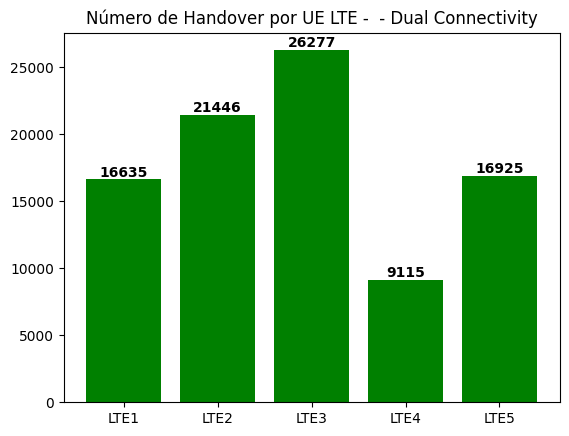

In [ ]:
#############################
### Rede LTE
# Make a random dataset:
print(hop1.iloc[-1])
height = [hop1.iloc[-1],hop3.iloc[-1],hop5.iloc[-1],hop7.iloc[-1],hop9.iloc[-1]]
bars = ('LTE1', 'LTE2', 'LTE3', 'LTE4', 'LTE5')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

bar_colors = ['green']
plt.bar(y_pos, height, color=bar_colors)

# Create names on the x-axis
plt.xticks(y_pos, bars)

for i, val in enumerate(height):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

#plt.ylim([70000, 80000])

plt.title("Número de Handover por UE LTE -  - Dual Connectivity")

# Show graphic
plt.show()

#################################################################

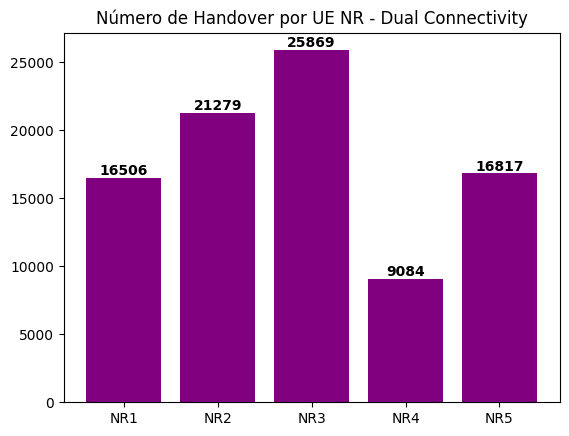

In [ ]:
#############################
### Rede 5G
# Make a random dataset:
height = [hop0.iloc[-1],hop2.iloc[-1],hop4.iloc[-1],hop6.iloc[-1],hop8.iloc[-1]]
bars = ('NR1', 'NR2', 'NR3', 'NR4', 'NR5')
y_pos = np.arange(len(bars))

# Create bars
bar_colors = ['purple']
plt.bar(y_pos, height, color=bar_colors)

# Create names on the x-axis
plt.xticks(y_pos, bars)

for i, val in enumerate(height):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

#plt.ylim([70000, 80000])

plt.title("Número de Handover por UE NR - Dual Connectivity")

# Show graphic
plt.show()

#################################################################

In [ ]:
print(list(concatenated_df.columns))

['tempo', 'id', 'rssi', 'current_id', 'current_rssi', 'hysteresis', 'rsrp', 'sinr', 'distance_ue', 'dual', 'trigger']


In [ ]:
soma_nr = hop0.iloc[-1] + hop2.iloc[-1] + hop4.iloc[-1] + hop6.iloc[-1] + hop8.iloc[-1]
print(soma_nr)

soma_lte = hop1.iloc[-1] + hop3.iloc[-1] + hop5.iloc[-1] + hop7.iloc[-1] + hop9.iloc[-1]

print(soma_lte)


# Importando a biblioteca pandas
import pandas as pd
from sklearn.utils import resample
# Supondo que 'concated_df_befores' seja o nome do seu DataFrame

# Contando ocorrências de 5 e 4 na coluna 'dual'
contagem_ocorrencias = concatenated_df['dual'].value_counts()

# Obtendo o número de ocorrências de 5 e 4
ocorrencias_de_5 = contagem_ocorrencias.get(5, 0)
ocorrencias_de_4 = contagem_ocorrencias.get(4, 0)

# Imprimindo o resultado
print("Número de ocorrências de 5:", ocorrencias_de_5)
print("Número de ocorrências de 4:", ocorrencias_de_4)


print("***********************************************")

condicao = (concatenated_df['dual'] == 5) & (concatenated_df['trigger'] == 1)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 5 e 'trigger' é 1 na mesma linha: {contagem}")


condicao = (concatenated_df['dual'] == 5) & (concatenated_df['trigger'] == 0)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 5 e 'trigger' é 0 na mesma linha: {contagem}")


condicao = (concatenated_df['dual'] == 4) & (concatenated_df['trigger'] == 1)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 4 e 'trigger' é 1 na mesma linha: {contagem}")


condicao = (concatenated_df['dual'] == 4) & (concatenated_df['trigger'] == 0)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 4 e 'trigger' é 0 na mesma linha: {contagem}")


# Supondo que concatenated_df seja seu DataFrame
# Separar as classes
df_5_1 = concatenated_df[(concatenated_df['dual'] == 5) & (concatenated_df['trigger'] == 1)]
df_5_0 = concatenated_df[(concatenated_df['dual'] == 5) & (concatenated_df['trigger'] == 0)]
df_4_1 = concatenated_df[(concatenated_df['dual'] == 4) & (concatenated_df['trigger'] == 1)]
df_4_0 = concatenated_df[(concatenated_df['dual'] == 4) & (concatenated_df['trigger'] == 0)]

# Subamostragem das classes majoritárias
df_5_0_downsampled = resample(df_5_0, replace=False, n_samples=65929, random_state=42)
df_4_1_downsampled = resample(df_4_1, replace=False, n_samples=65929, random_state=42)

# Superamostragem das classes minoritárias
df_5_1_upsampled = resample(df_5_1, replace=True, n_samples=65929, random_state=42)
df_4_0_upsampled = resample(df_4_0, replace=True, n_samples=65929, random_state=42)

# Concatenar todas as classes balanceadas
balanced_df = pd.concat([df_5_0_downsampled, df_4_1_downsampled, df_5_1_upsampled, df_4_0_upsampled])

# Embaralhar o DataFrame resultante
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Atualizar o concatenated_df com o DataFrame balanceado
concatenated_df = balanced_df

# Verificar a nova distribuição
print(concatenated_df['dual'].value_counts())
print(concatenated_df['trigger'].value_counts())


print("***********************************************")

condicao = (concatenated_df['dual'] == 5) & (concatenated_df['trigger'] == 1)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 5 e 'trigger' é 1 na mesma linha: {contagem}")


condicao = (concatenated_df['dual'] == 5) & (concatenated_df['trigger'] == 0)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 5 e 'trigger' é 0 na mesma linha: {contagem}")


condicao = (concatenated_df['dual'] == 4) & (concatenated_df['trigger'] == 1)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 4 e 'trigger' é 1 na mesma linha: {contagem}")


condicao = (concatenated_df['dual'] == 4) & (concatenated_df['trigger'] == 0)
contagem = condicao.sum()

print(f"Ocorrências onde 'dual' é 4 e 'trigger' é 0 na mesma linha: {contagem}")

89555
90398
Número de ocorrências de 5: 310577
Número de ocorrências de 4: 156326
***********************************************
Ocorrências onde 'dual' é 5 e 'trigger' é 1 na mesma linha: 89555
Ocorrências onde 'dual' é 5 e 'trigger' é 0 na mesma linha: 221022
Ocorrências onde 'dual' é 4 e 'trigger' é 1 na mesma linha: 90397
Ocorrências onde 'dual' é 4 e 'trigger' é 0 na mesma linha: 65929
dual
5    884088
Name: count, dtype: int64
trigger
0    884088
Name: count, dtype: int64
***********************************************
Ocorrências onde 'dual' é 5 e 'trigger' é 1 na mesma linha: 0
Ocorrências onde 'dual' é 5 e 'trigger' é 0 na mesma linha: 884088
Ocorrências onde 'dual' é 4 e 'trigger' é 1 na mesma linha: 0
Ocorrências onde 'dual' é 4 e 'trigger' é 0 na mesma linha: 0


In [ ]:
concatenated_df.describe()

,id,current_id,dual,trigger
count,466903.000000,466903.000000,466903.000000,466903.000000
mean,5.814668,4.733493,4.665185,0.385416
std,3.080756,3.643379,0.471926,0.486694
min,1.000000,0.000000,4.000000,0.000000
25%,3.000000,1.000000,4.000000,0.000000
50%,6.000000,5.000000,5.000000,0.000000
75%,9.000000,8.000000,5.000000,1.000000
max,10.000000,10.000000,5.000000,1.000000
